# Setup

## OpenAI Key 등록
- [OpenAI Key 발급](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = '생성한 키 입력'

## 구글 드라이브 연결

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/3. Large Language Models/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


## install

In [ ]:
!pip install -U langchain langchain-community langchain-experimental langchain-core langchain-openai langsmith langchainhub pymupdf faiss-cpu pypdf unstructured chromadb pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

# [RAG 의 기능별 다양한 모듈 활용기](https://wikidocs.net/234009)

## [단계 1: 문서 로드(Load Documents)](https://python.langchain.com/docs/how_to/#document-loaders)

### 웹페이지

In [ ]:
# 뉴스기사의 내용을 로드하고, 청크로 나누고, 인덱싱합니다.
loader = WebBaseLoader(
    web_paths=("https://www.bbc.com/news/business-68092814",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "main",
            attrs={"id": ["main-content"]},
        )
    ),
)
docs = loader.load()
print(f"문서의 수: {len(docs)}")
docs[0].page_content[:500]

문서의 수: 1


'Could AI \'trading bots\' transform the world of investing?Getty ImagesIt is hard for both humans and computers to predict stock market movementsSearch for "AI investing" online, and you\'ll be flooded with endless offers to let artificial intelligence manage your money.I recently spent half an hour finding out what so-called AI "trading bots" could apparently do with my investments.Many prominently suggest that they can give me lucrative returns. Yet as every reputable financial firm warns - your '

### PDF

In [ ]:
from langchain.document_loaders import PyPDFLoader

# PDF 파일 로드. 파일의 경로 입력
loader = PyPDFLoader(DATA_PATH+"SPRI_AI_Brief_2023년12월호_F.pdf")

# 페이지 별 문서 로드
docs = loader.load()
print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[10].page_content[:500]}")
print(f"\n[metadata]\n{docs[10].metadata}\n")


문서의 수: 23

[페이지내용]
SPRi AI Brief |  
2023-12 월호
8코히어 , 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개
n코히어와 12개 기관이  광범위한 데이터셋에 대한 감사를 통해 원본 데이터 출처, 재라이선스 상태, 
작성자 등 다양한 정보를 제공하는 ‘데이터 출처 탐색기 ’ 플랫폼을 출시
n대화형 플랫폼을 통해 개발자는 데이터셋의 라이선스 상태를 쉽게 파악할 수 있으며 데이터셋의 
구성과 계보도 추적 가능KEY Contents
£데이터 출처 탐색기 , 광범위한 데이터셋 정보 제공을 통해 데이터 투명성 향상
nAI 기업 코히어 (Cohere) 가 매사추세츠 공과⼤(MIT), 하버드 ⼤ 로스쿨 , 카네기멜론 ⼤ 등 12개 기관과  
함께 2023 년 10월 25일 ‘데이터 출처 탐색기 (Data Provenance Explorer)’ 플랫폼을 공개
∙AI 모델 훈련에 사용되는 데이터셋의 불분명한 출처로 인해 데이터 투명성이 확보되지 않아 다양한 
법적·윤리적 문제가 발생
∙이에 연구

[metadata]
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 10}



### CSV

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

# CSV 파일 로드
loader = CSVLoader(file_path=DATA_PATH+"titanic.csv")
docs = loader.load()
print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[10].page_content[:500]}")
print(f"\n[metadata]\n{docs[10].metadata}\n")


문서의 수: 20

[페이지내용]
PassengerId: 11
Survived: 1
Pclass: 3
Name: Sandstrom, Miss. Marguerite Rut
Sex: female
Age: 4
SibSp: 1
Parch: 1
Ticket: PP 9549
Fare: 16.7
Cabin: G6
Embarked: S

[metadata]
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/titanic.csv', 'row': 10}



### TXT 파일

In [ ]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(DATA_PATH+"appendix-keywords.txt")
docs = loader.load()
print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[0].page_content[:500]}")
print(f"\n[metadata]\n{docs[0].metadata}\n")


문서의 수: 1

[페이지내용]
Semantic Search

정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding

정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.
예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.
연관키워드: 자연어 처리, 벡터화, 딥러닝

Token

정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.
예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.
연관키워드: 토큰화, 자연어

[metadata]
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/appendix-keywords.txt'}



### [폴더 내의 모든 파일 로드](https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/file_directory/)

- txt

In [ ]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import TextLoader

loader = DirectoryLoader(DATA_PATH, glob="**/*.txt", show_progress=True, loader_cls=TextLoader)
docs = loader.load()

print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[0].page_content[:500]}")
print(f"\n[metadata]\n{docs[0].metadata}\n")







  0%|          | 0/7 [00:00<?, ?it/s]




 86%|████████▌ | 6/7 [00:00<00:00,  7.17it/s]




100%|██████████| 7/7 [00:01<00:00,  4.86it/s]

문서의 수: 7

[페이지내용]
제목: 
AI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시

내용:
앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) '올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.
벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. 
이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. 
올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 

[metadata]
{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/news.txt'}



- pdf

In [ ]:
loader = DirectoryLoader(DATA_PATH, glob="**/*.pdf", show_progress=True, loader_cls=PyPDFLoader)
docs = loader.load()

print(f"문서의 수: {len(docs)}\n")
print("[메타데이터]\n")
print(docs[0].metadata)
print("\n========= [앞부분] 미리보기 =========\n")
print(docs[0].page_content[2500:3000])


100%|██████████| 3/3 [00:11<00:00,  3.96s/it]

문서의 수: 123

[메타데이터]

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 0}

========= [앞부분] 미리보기 =========




- Python

In [ ]:
from langchain_community.document_loaders import PythonLoader

loader = DirectoryLoader(DATA_PATH, glob="**/*.py", loader_cls=PythonLoader)
docs = loader.load()

print(f"문서의 수: {len(docs)}\n")
print("[메타데이터]\n")
print(docs[0].metadata)
print("\n========= [앞부분] 미리보기 =========\n")
print(docs[0].page_content[:500])


문서의 수: 1

[메타데이터]

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/audio_utils.py'}

========= [앞부분] 미리보기 =========

import re
import os
from pytube import YouTube
from moviepy.editor import AudioFileClip, VideoFileClip
from pydub import AudioSegment
from pydub.silence import detect_nonsilent


def extract_abr(abr):
    youtube_audio_pattern = re.compile(r"\d+")
    kbps = youtube_audio_pattern.search(abr)
    if kbps:
        kbps = kbps.group()
        return int(kbps)
    else:
        return 0


def get_audio_filepath(filename):
    # audio 폴더가 없으면 생성
    if not os.path.isdir("audio"):
        os.mkdir("au


## 단계 2: 문서 분할(Split Documents)

In [ ]:
# chain of density 논문의 일부 내용을 불러옵니다
text = ""
with open(DATA_PATH+"chain-of-density.txt", "r") as f:
    text = f.read()[:500]

text

'Selecting the “right” amount of information to include in a summary is a difficult task. \nA good summary should be detailed and entity-centric without being overly dense and hard to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial entity-sparse summary before iteratively incorporating missing salient entities without increasing the length. Summaries genera'

In [ ]:
# 뉴스기사의 내용을 로드하고, 청크로 나누고, 인덱싱합니다.
loader = WebBaseLoader(
    web_paths=("https://www.bbc.com/news/business-68092814",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "main",
            attrs={"id": ["main-content"]},
        )
    ),
)
docs = loader.load()
print(f"문서의 수: {len(docs)}")
docs[0].page_content[:500]

문서의 수: 1


'Could AI \'trading bots\' transform the world of investing?Getty ImagesIt is hard for both humans and computers to predict stock market movementsSearch for "AI investing" online, and you\'ll be flooded with endless offers to let artificial intelligence manage your money.I recently spent half an hour finding out what so-called AI "trading bots" could apparently do with my investments.Many prominently suggest that they can give me lucrative returns. Yet as every reputable financial firm warns - your '

### CharacterTextSplitter

- 시각화 예제: https://chunkviz.up.railway.app/

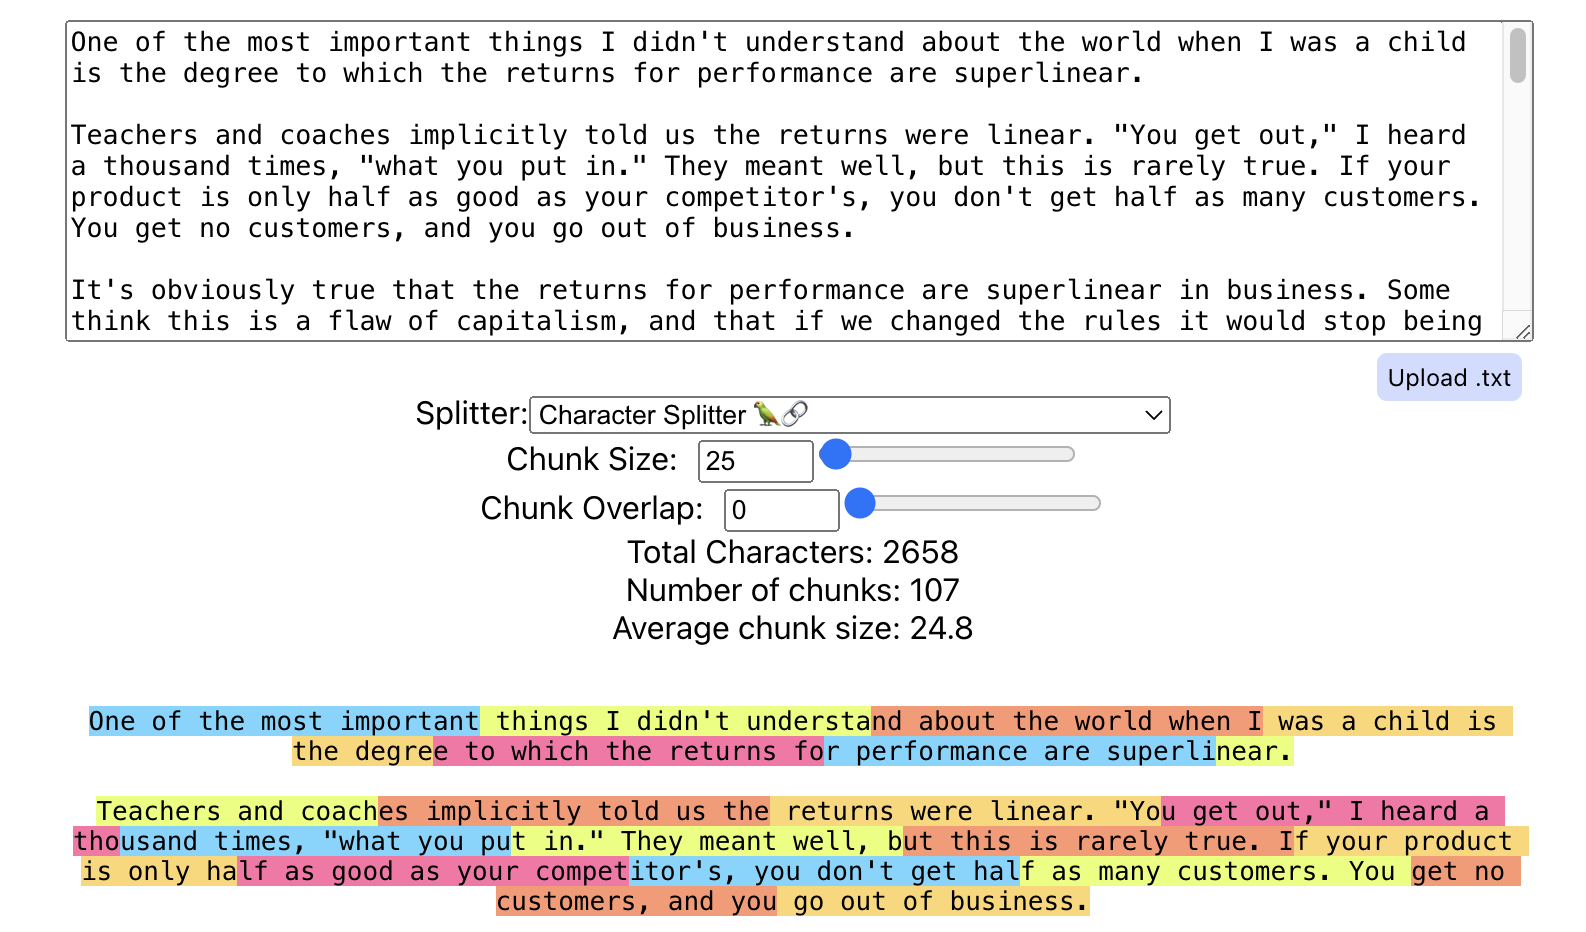

- 이것은 가장 간단한 방법입니다. 이 방법은 문자를 기준으로 분할합니다(기본값은 "\n\n") 그리고 청크의 길이를 문자의 수로 측정합니다.
  1. 텍스트가 어떻게 분할되는지: 단일 문자 단위
  2. 청크 크기가 어떻게 측정되는지: len of characters.
- `CharacterTextSplitter` 클래스는 텍스트를 특정 크기의 청크로 분할하는 기능을 제공합니다.
  - `separator` 매개변수는 청크를 구분하는 데 사용되는 문자열을 지정하며, 여기서는 두 개의 개행 문자("\n\n")를 사용합니다
  - `chunk_size`는 각 청크의 최대 길이를 결정합니다
  - `chunk_overlap`은 인접한 청크 간에 겹치는 문자의 수를 지정합니다.
  - `length_function`은 청크의 길이를 계산하는 데 사용되는 함수를 결정하며, 기본적으로 문자열의 길이를 반환하는 len 함수가 사용됩니다.
  - `is_separator_regex`는 separator가 정규 표현식으로 해석될지 여부를 결정하는 불리언 값입니다.

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator=" ",
    chunk_size=1000,
    chunk_overlap=100
)


- 이 함수는 text_splitter 객체의 create_documents 메소드를 사용하여 주어진 텍스트(state_of_the_union)를 여러 문서로 분할하고, 그 결과를 texts 변수에 저장합니다.
- 이후 texts의 첫 번째 문서를 출력합니다. 이 과정은 텍스트 데이터를 처리하고 분석하기 위한 초기 단계로 볼 수 있으며, 특히 큰 텍스트 데이터를 관리 가능한 크기의 단위로 나누는 데 유용합니다.

In [ ]:
# document를 청크로 나누어줍니다.
split_docs = text_splitter.split_documents(docs)
len(split_docs)

8

In [ ]:
split_docs[0]

Document(metadata={'source': 'https://www.bbc.com/news/business-68092814'}, page_content='Could AI \'trading bots\' transform the world of investing?Getty ImagesIt is hard for both humans and computers to predict stock market movementsSearch for "AI investing" online, and you\'ll be flooded with endless offers to let artificial intelligence manage your money.I recently spent half an hour finding out what so-called AI "trading bots" could apparently do with my investments.Many prominently suggest that they can give me lucrative returns. Yet as every reputable financial firm warns - your capital may be at risk.Or putting it more simply - you could lose your money - whether it is a human or a computer that is making stock market decisions on your behalf.Yet such has been the hype about the ability of AI over the past few years, that almost one in three investors would be happy to let a trading bot make all the decisions for them, according to one 2023 survey in the US.John Allan says inve

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=10, separator="\n")
text_splitter.split_text(text)

['Selecting the “right” amount of information to include in a summary is a difficult task.',
 'A good summary should be detailed and entity-centric without being overly dense and hard to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial entity-sparse summary before iteratively incorporating missing salient entities without increasing the length. Summaries genera']

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=10, separator=" ")
text_splitter.split_text(text)

['Selecting the “right” amount of information to include in a summary is a difficult task. \nA good',
 'A good summary should be detailed and entity-centric without being overly dense and hard to follow.',
 'to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with',
 'with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial',
 'an initial entity-sparse summary before iteratively incorporating missing salient entities without',
 'without increasing the length. Summaries genera']

### RecursiveTextSplitter

- 이 텍스트 분할기는 일반 텍스트에 권장되는 텍스트 분할기입니다.
  1. 텍스트가 어떻게 분할 규칙: list of separators
  2. 청크 크기가 어떻게 측정되는가: len of characters
- RecursiveCharacterTextSplitter 클래스는 텍스트를 재귀적으로 분할하는 기능을 제공합니다.
- 이 클래스는 chunk_size로 분할할 청크의 크기, chunk_overlap으로 인접 청크 간의 겹침 크기, length_function으로 청크의 길이를 계산하는 함수, 그리고 is_separator_regex로 구분자가 정규 표현식인지 여부를 지정하는 매개변수를 받습니다.
- 예시에서는 청크 크기를 100, 겹침 크기를 20으로 설정하고, 길이 계산 함수로 len을 사용하며, 구분자가 정규 표현식이 아님을 나타내기 위해 is_separator_regex를 False로 설정합니다.

In [ ]:
# langchain 패키지에서 RecursiveCharacterTextSplitter 클래스를 가져옵니다.
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
character_text_splitter = CharacterTextSplitter(
    chunk_size=100, chunk_overlap=10, separator=" "
)
for sent in character_text_splitter.split_text(text):
    print(sent)

print("===" * 20)

recursive_text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100, chunk_overlap=10
)
for sent in recursive_text_splitter.split_text(text):
    print(sent)

Selecting the “right” amount of information to include in a summary is a difficult task. 
A good
A good summary should be detailed and entity-centric without being overly dense and hard to follow.
to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with
with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial
an initial entity-sparse summary before iteratively incorporating missing salient entities without
without increasing the length. Summaries genera
Selecting the “right” amount of information to include in a summary is a difficult task.
A good summary should be detailed and entity-centric without being overly dense and hard to follow.
follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with what
with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an
an initial entity-sparse summary before iteratively incorporating missing s

- 지정한 separators 리스트를 순차적으로 시도하며 주어진 문서를 분할합니다.
- 청크가 충분히 작아질 때까지 순서대로 분할을 시도합니다. 기본 목록은 `["\n\n", "\n", " ", ""]`입니다.
- 이는 일반적으로 의미적으로 가장 연관성이 강한 텍스트 조각인 것처럼 보이는 모든 단락(그리고 문장, 단어)을 가능한 한 길게 유지하려는 효과가 있습니다.

In [ ]:
# recursive_text_splitter 에 기본 지정된 separators 를 확인합니다.
recursive_text_splitter._separators

['\n\n', '\n', ' ', '']

### Semantic Similarity
- 의미적 유사성을 기준으로 텍스트를 분할합니다.
- 높은 수준(high level)에서 문장으로 분할한 다음 3개 문장으로 그룹화한 다음 임베딩 공간에서 유사한 문장을 병합하는 방식입니다.

In [ ]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

# SemanticChunker 를 생성합니다.
semantic_text_splitter = SemanticChunker(
    OpenAIEmbeddings(), add_start_index=True)

In [ ]:
for sent in semantic_text_splitter.split_text(text):
    print(sent)
    print("===" * 20)

Selecting the “right” amount of information to include in a summary is a difficult task. A good summary should be detailed and entity-centric without being overly dense and hard to follow. To better understand this tradeoff, we solicit increasingly dense GPT-4 summaries with what we refer to as a “Chain of Density” (CoD) prompt. Specifically, GPT-4 generates an initial entity-sparse summary before iteratively incorporating missing salient entities without increasing the length.
Summaries genera


## 3 단계: 임베딩

In [ ]:
import bs4
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 뉴스기사 내용을 로드하고, 청크로 나누고, 인덱싱합니다.
url = "https://n.news.naver.com/article/437/0000378416"
loader = WebBaseLoader(
    web_paths=(url,),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "div",
            attrs={"class": ["newsct_article _article_body", "media_end_head_title"]},
        )
    ),
)
docs = loader.load()


# 단계 2: 문서 분할(Split Documents)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)

splits = text_splitter.split_documents(docs)

### 유료 과금 임베딩(OpenAI)
- 다음은 OpenAI 의 지원되는 Embedding 모델들의 목록입니다.
- 기본 값은 `text-embeding-ada-002` 입니다.

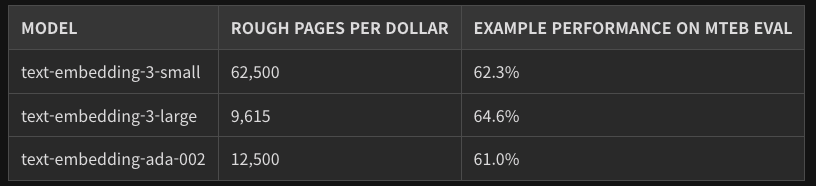

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_openai.embeddings import OpenAIEmbeddings

# 단계 3: 임베딩 & 벡터스토어 생성(Create Vectorstore)
# 벡터스토어를 생성합니다.
vectorstore = FAISS.from_documents(
    documents=splits, embedding=OpenAIEmbeddings())

In [ ]:
vectorstore = FAISS.from_documents(
    documents=splits, embedding=OpenAIEmbeddings(model="text-embedding-3-small")
)

### [무료 Open Source 기반 임베딩](https://python.langchain.com/api_reference/community/embeddings/langchain_community.embeddings.huggingface.HuggingFaceBgeEmbeddings.html)

In [ ]:
!pip install sentence_transformers

  Using cached sentence_transformers-3.1.0-py3-none-any.whl.metadata (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from langchain_community.vectorstores import FAISS

model_name = "BAAI/bge-large-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
hf = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)
vectorstore = FAISS.from_documents(
    documents=splits, embedding=hf
)

## 4단계: 벡터스토어 생성(Create Vectorstore)

### FAISS

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_openai.embeddings import OpenAIEmbeddings

# FAISS DB 적용
vectorstore = FAISS.from_documents(
    documents=splits, embedding=OpenAIEmbeddings())

### Chroma

In [ ]:
from langchain_community.vectorstores import Chroma

# Chroma DB 적용
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

## [5단계: Retriever 생성](https://python.langchain.com/docs/how_to/#retrievers)
- 리트리버는 구조화되지 않은 쿼리가 주어지면 문서를 반환하는 인터페이스입니다.
- 리트리버는 문서를 저장할 필요 없이 문서를 반환(또는 검색)하기만 합니다.

### 유사도 기반 검색

In [ ]:
query = "회사의 저출생 정책이 뭐야?"

retriever = vectorstore.as_retriever(search_type="similarity")
search_result = retriever.get_relevant_documents(query)
print(search_result)

<ipython-input-23-f1e60a70053f>:4: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  search_result = retriever.get_relevant_documents(query)


[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책"), Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content='남성 직원의 육아휴직을 의무화한 곳도 있습니다.사내 어린이집을 밤 10시까지 운영하고 셋째를 낳으면 무조건 승진시켜 주기도 합니다.한 회사는 지난해 네쌍둥이를 낳은 직원에 의료비를 지원해 관심을 모았습니다.정부 대신 회사가 나서는 출산장려책이 사회적 분위기를 바꿀 거라는 기대가 커지는 가운데, 여력이 부족한 중소지원이 필요하다는 목소리도 나옵니다.[영상디자인 곽세미]'), Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="[앵커]올해 아이 낳을 계획이 있는 가족이라면 솔깃할 소식입니다. 정부가 저출생 대책으로 매달 주는 부모 급여, 0세 아이는 100만원으로 올렸습니다. 여기에 첫만남이용권, 아동수당까지 더하면 아이 돌까지 1년 동안 1520만원을 받습니다. 지자체도 경쟁하듯 지원에 나섰습니다. 인천시는 새로 태어난 아기, 18살될 때까지 1억원을 주겠다. 광주시도 17살될 때까지 7400만원 주겠다고 했습니다. 선거 때면 나타나서 아이 낳으면 현금 주겠다고 밝힌 사람이 있었죠. 과거에는 표만 노린 '황당 공약'이라는 비판이 따라다녔습니다. 그런데 지금은 출산율이 이보다 더 나쁠 수 없다보니, 이런 현금성 지원을 진지하게 정책화 하는 상황까지 온 겁니다. 게다가 기업들도 뛰어들고 있습니다. 이번에는 출산한 직원에게 단번에 1억원을 주겠다는 회사까지 나타났습니다.이상화 기자가 취재했습니다.[기자]한 그룹사가 오늘 파격적인 저출생 정책을 내놨습니다.

- similarity_score_threshold 는 유사도 기반 검색에서 score_threshold 이상인 결과만 반환합니다.

In [ ]:
query = "회사의 저출생 정책이 뭐야?"

retriever = vectorstore.as_retriever(
    search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.8}
)
search_result = retriever.get_relevant_documents(query)
print(search_result)

[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책")]


- maximum marginal search result 를 사용하여 검색합니다.

In [ ]:
query = "회사의 저출생 정책이 뭐야?"

retriever = vectorstore.as_retriever(search_type="mmr", search_kwargs={"k": 2})
search_result = retriever.get_relevant_documents(query)
print(search_result)

[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책"), Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content='남성 직원의 육아휴직을 의무화한 곳도 있습니다.사내 어린이집을 밤 10시까지 운영하고 셋째를 낳으면 무조건 승진시켜 주기도 합니다.한 회사는 지난해 네쌍둥이를 낳은 직원에 의료비를 지원해 관심을 모았습니다.정부 대신 회사가 나서는 출산장려책이 사회적 분위기를 바꿀 거라는 기대가 커지는 가운데, 여력이 부족한 중소지원이 필요하다는 목소리도 나옵니다.[영상디자인 곽세미]')]


### 다양한 쿼리 생성

In [ ]:
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain_openai import ChatOpenAI

question = "회사의 저출생 정책이 뭐야?"

llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")

retriever_from_llm = MultiQueryRetriever.from_llm(
    retriever=vectorstore.as_retriever(), llm=llm
)

In [ ]:
# Set logging for the queries
import logging

logging.basicConfig()
logging.getLogger("langchain.retrievers.multi_query").setLevel(logging.INFO)

In [ ]:
unique_docs = retriever_from_llm.get_relevant_documents(query=question)
len(unique_docs)


INFO:langchain.retrievers.multi_query:Generated queries: ['1. 회사의 출산율 저하 정책은 무엇인가요?', '2. 회사가 채택한 출산율 감소 정책은 어떤 것인가요?', '3. 회사의 출산율 저하 대책은 어떻게 되나요?']


3

### Ensemble Retriever

In [ ]:
!pip install rank_bm25

In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

In [ ]:
doc_list = [
    "난 오늘 많이 먹어서 배가 정말 부르다",
    "떠나는 저 배가 오늘 마지막 배인가요?",
    "내가 제일 좋아하는 과일들은 배, 사과, 키워, 수박 입니다.",
]

# initialize the bm25 retriever and faiss retriever
bm25_retriever = BM25Retriever.from_texts(doc_list)
bm25_retriever.k = 2

faiss_vectorstore = FAISS.from_texts(doc_list, OpenAIEmbeddings())
faiss_retriever = faiss_vectorstore.as_retriever(search_kwargs={"k": 2})

# initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, faiss_retriever], weights=[0.5, 0.5]
)

In [ ]:
def pretty_print(docs):
    for i, doc in enumerate(docs):
        print(f"[{i+1}] {doc.page_content}")

In [ ]:
sample_query = "나 요즘 배에 정말 살이 많이 쪘어..."
print(f"[Query]\n{sample_query}\n")
relevant_docs = bm25_retriever.get_relevant_documents(sample_query)
print("[BM25 Retriever]")
pretty_print(relevant_docs)
print("===" * 20)
relevant_docs = faiss_retriever.get_relevant_documents(sample_query)
print("[FAISS Retriever]")
pretty_print(relevant_docs)
print("===" * 20)
relevant_docs = ensemble_retriever.get_relevant_documents(sample_query)
print("[Ensemble Retriever]")
pretty_print(relevant_docs)

[Query]
나 요즘 배에 정말 살이 많이 쪘어...

[BM25 Retriever]
[1] 난 오늘 많이 먹어서 배가 정말 부르다
[2] 내가 제일 좋아하는 과일들은 배, 사과, 키워, 수박 입니다.
[FAISS Retriever]
[1] 난 오늘 많이 먹어서 배가 정말 부르다
[2] 떠나는 저 배가 오늘 마지막 배인가요?
[Ensemble Retriever]
[1] 난 오늘 많이 먹어서 배가 정말 부르다
[2] 내가 제일 좋아하는 과일들은 배, 사과, 키워, 수박 입니다.
[3] 떠나는 저 배가 오늘 마지막 배인가요?


## 6단계: 프롬프트 생성(Create Prompt)

- 프롬프트 엔지니어링은 주어진 데이터(context)를 토대로 우리가 원하는 결과를 도출할 때 중요한 역할을 합니다.

[TIP1]
- 만약, retriever 에서 도출한 결과에서 중요한 정보가 누락된다면 retriever 의 로직을 수정해야 합니다.
- 만약, retriever 에서 도출한 결과가 많은 정보를 포함하고 있지만, llm 이 그 중에서 중요한 정보를 찾지 못한거나 원하는 형태로 출력하지 않는다면 프롬프트를 수정해야 합니다.

[TIP2]
- LangSmith 의 hub 에는 검증된 프롬프트가 많이 업로드 되어 있습니다.
- 검증된 프롬프트를 활용하거나 약간 수정한다면 비용과 시간을 절약할 수 있습니다.
- https://smith.langchain.com/hub/search?q=rag

In [ ]:
from langchain import hub

In [ ]:
prompt = hub.pull("rlm/rag-prompt")
prompt

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:322: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langsmith/client.py:5301: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  prompt = loads(json.dumps(prompt_object.manifest))


ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

## 7단계: 언어모델 생성(Create LLM)

In [ ]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")

- 다음의 방식으로 토큰 사용량을 확인할 수 있습니다.

In [ ]:
from langchain.callbacks import get_openai_callback

with get_openai_callback() as cb:
    result = model.invoke("대한민국의 수도는 어디인가요?")
print(cb)

Tokens Used: 39
	Prompt Tokens: 24
	Completion Tokens: 15
Successful Requests: 1
Total Cost (USD): $3.45e-05


# [문서 요약(Summarize Chain)](https://colab.research.google.com/drive/1xh-wnw7cGVdeIIE2LuArc9IBSShvHhSL?usp=sharing#scrollTo=6ANyHV9S-Iqv)

In [ ]:
import os
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

from langchain_openai import ChatOpenAI
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFLoader
from langchain.chains.summarize import load_summarize_chain

## Load pdf

In [ ]:
!wget https://github.com/kairess/toy-datasets/raw/master/Demian.pdf

--2024-10-09 04:09:05--  https://github.com/kairess/toy-datasets/raw/master/Demian.pdf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kairess/toy-datasets/master/Demian.pdf [following]
--2024-10-09 04:09:05--  https://raw.githubusercontent.com/kairess/toy-datasets/master/Demian.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5683449 (5.4M) [application/octet-stream]
Saving to: ‘Demian.pdf’

Demian.pdf          100%[===================>]   5.42M  --.-KB/s    in 0.03s   

2024-10-09 04:09:05 (156 MB/s) - ‘Demian.pdf’ saved [5683449/5683449]



In [ ]:
pdf_path = "Demian.pdf"
loader = PyPDFLoader(pdf_path)
documents = loader.load()

print(f"전체 페이지 수: {len(documents)}")

full_text = "\n".join([doc.page_content for doc in documents[:10]]) # 10페이지 제한 (비용, 시간)

full_text[:1000]

전체 페이지 수: 182


"DEMIAN • \nDownloaded from https://www.holybooks.com\nHERMANN \nHESSE • DEMIAN \n* \nTranslated by W. J. Strachan \nLondon \nDownloaded from https://www.holybooks.com\nPrologue \nI cannot tell my story without going a long way back. \nIf it were possible I would go back much farther still to \nthe very earliest years of my childhood and beyond them \nto my family origins. \nWhen poets write novels they are apt to behave as if \nthey were gods, with the power to look beyond and com\xad\nprehend any human story and serve it up as if the \nAlmighty himself, omnipresent, were relating it in all \nits naked truth. That I am no more able to do than the \npoets. But my story is more important to me than any \npoet's story to him, for it is my own-and it is the story \nof a huffian being-not an invented, idealised person \nbut a real, live, uniq:-e being. What constitutes a real, \nlive human being is more of a mystery than ever these \ndays, and men-each one of whom is a valuable, unique \ne

## Text Splitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    separators=["\n\n", "\n", " ", ""]
)
texts = text_splitter.create_documents([full_text])

print("===== PAGE 2 =====")
print(texts[2])
print("===== PAGE 3 =====")
print(texts[3])

===== PAGE 2 =====
page_content='creature, deserving the \ltmOSt attention. In each indi­
vidual the spirit is made 'flesh, in each one the whole of 
creation suffers, in each one a Saviour is crucified. 
Few people nowadays know what man is. Many feel it 
intuitively and die more easily for that reason, just as I 
shall die more easily when I have completed this story. 
I cannot call myself a scholar. I have always been and 
still am a seeker but I no longer do my seeking among 
the stars or in books. I am beginning to hear the lessons 
which whisper in my blood. Mine is not a pleasant story, 
it does not possess the gentle harmony of invented tales; 
like the lives of all men who have given up trying to 
deceive themselves, it is a mixture of nonsense and 
chaos, madness and dreams. 
The life of every man is a way to himself, an attempt 
at a way, the suggestion of a path. No man has ever 
been utterly himself, yet every man strives to be so, the 
dull. the intelligent, each one as b

## LLM

In [ ]:
# 언어 모델 초기화
llm = ChatOpenAI(model="gpt-4o", temperature=0)

## load_summarize_chain(문서요약)

1. `Map` 단계
  - 긴 문서를 작은 조각들로 나눕니다.
  - 각 조각에 대해 개별적으로 요약을 생성합니다.
2. `Reduce` 단계
  - `Map` 단계에서 생성된 모든 개별 요약들을 모읍니다.
  - 이 요약들을 하나의 최종 요약으로 결합합니다.

In [ ]:
# 요약 체인 설정
summarize_chain = load_summarize_chain(llm, chain_type="map_reduce")

### run

In [ ]:
# 문서 요약 생성
summary = summarize_chain.run(texts)

In [ ]:
# 요약 결과 출력
summary

## RetrievalQA(질문응답)

In [ ]:
# RetrievalQA 체인 생성
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=vectorstore.as_retriever(),
    return_source_documents=True
)

### 1.question
- 문서에 있는 질문

In [ ]:
question = "싱클레어를 괴롭힌 사람의 이름은?"
result = qa_chain.invoke({"query": question})

- result

In [ ]:
answer = result["result"]
answer

- source_documents
  - 답변의 출처 확인

In [ ]:
sources = result["source_documents"]

# 출처 출력 (상위 3개 출처만 표시)
for idx, source in enumerate(sources[:3]):
    print(f"===== 출처 {idx + 1} =====")
    print(source)

### 2.question
- 문서에 없는 질문

In [ ]:
question = "데미안의 외모는?"
result = qa_chain.invoke({"query": question})

In [ ]:
answer = result["result"]
answer

# [PDF 문서 기반 QA(Question-Answer)](https://wikidocs.net/251190)

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

## 1. 사전작업(Pre-processing) - 1~4 단계

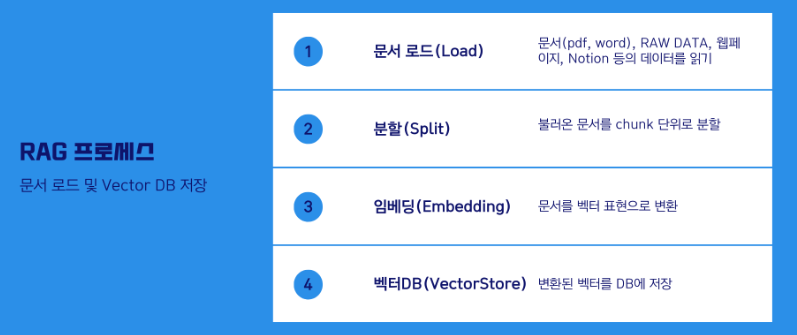

### 단계 1: 문서 로드(Load Documents)
- 문서 내용을 불러옵니다.

In [ ]:
loader = PyMuPDFLoader(DATA_PATH+"SPRI_AI_Brief_2023년12월호_F.pdf")
docs = loader.load()
print(f"문서의 페이지수: {len(docs)}")

문서의 페이지수: 23


In [ ]:
docs[0]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 0, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='2023년 12월호\n')

In [ ]:
docs[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf',
 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf',
 'page': 0,
 'total_pages': 23,
 'format': 'PDF 1.4',
 'title': '',
 'author': 'dj',
 'subject': '',
 'keywords': '',
 'creator': 'Hwp 2018 10.0.0.13462',
 'producer': 'Hancom PDF 1.3.0.542',
 'creationDate': "D:20231208132838+09'00'",
 'modDate': "D:20231208132838+09'00'",
 'trapped': ''}

In [ ]:
docs[0].page_content

'2023년 12월호\n'

### 단계 2: 문서 분할(Split Documents)
- 문서를 특정 기준(Chunk) 으로 분할합니다.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=50,
    length_function=len,
    separators=["\n\n", "\n", " ", ""]
)
split_documents = text_splitter.split_documents(docs)
print(f"분할된 청크의수: {len(split_documents)}")

분할된 청크의수: 43


In [ ]:
print("===== PAGE 2 =====")
print(split_documents[2])
print("===== PAGE 3 =====")
print(split_documents[3])

===== PAGE 2 =====
page_content='▹ IDC, 2027년 AI 소프트웨어 매출 2,500억 달러 돌파 전망··········································· 12
   ▹ 빌 게이츠, AI 에이전트로 인한 컴퓨터 사용의 패러다임 변화 전망································ 13
   ▹ 유튜브, 2024년부터 AI 생성 콘텐츠 표시 의무화···························································· 14
 3. 기술/연구
   ▹ 영국 과학혁신기술부, AI 안전 연구소 설립 발표······························································ 15
   ▹ 구글 딥마인드, 범용 AI 모델의 기능과 동작에 대한 분류 체계 발표······························ 16
   ▹ 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수 ··········································· 17
   
 4. 인력/교육     
   ▹ 영국 옥스퍼드 인터넷 연구소, AI 기술자의 임금이 평균 21% 높아······························· 18
   
   
 
Ⅱ. 주요 행사
   ▹CES 2024 ····························································································································· 19
   ▹AIMLA 2024 ························································································································· 19' metadata={'source': '/content/data

### 단계 3: 임베딩(Embedding) 생성
- 분할된(Chunk) 를 임베딩하여 저장합니다.

In [ ]:
embeddings = OpenAIEmbeddings()

### 단계 4: DB 생성(Create DB) 및 저장
- 임베딩된 Chunk 를 DB에 저장합니다.

In [ ]:
# 벡터스토어를 생성합니다.
vectorstore = FAISS.from_documents(
    documents=split_documents
    , embedding=embeddings)

## 2. RAG 수행(RunTime) - 5~8 단계


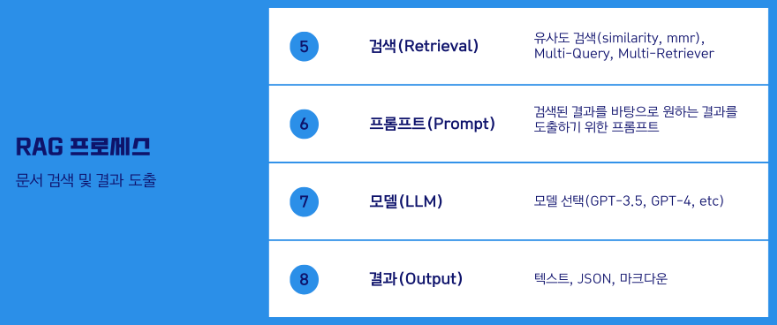

### 단계 5: 검색기(Retriever) 생성
- 쿼리(Query) 를 바탕으로 DB에서 검색하여 결과를 가져오기 위하여 리트리버를 정의합니다. 리트리버는 검색 알고리즘이며(Dense, Sparse) 리트리버로 나뉘게 됩니다. Dense: 유사도 기반 검색, Sparse: 키워드 기반 검색

In [ ]:
# 문서에 포함되어 있는 정보를 검색하고 생성합니다.
retriever = vectorstore.as_retriever()

In [ ]:
# 검색기에 쿼리를 날려 검색된 chunk 결과를 확인합니다.
result = retriever.invoke("삼성전자가 자체 개발한 AI 의 이름은?")
len(result)

4

In [ ]:
result[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf',
 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf',
 'page': 12,
 'total_pages': 23,
 'format': 'PDF 1.4',
 'title': '',
 'author': 'dj',
 'subject': '',
 'keywords': '',
 'creator': 'Hwp 2018 10.0.0.13462',
 'producer': 'Hancom PDF 1.3.0.542',
 'creationDate': "D:20231208132838+09'00'",
 'modDate': "D:20231208132838+09'00'",
 'trapped': ''}

In [ ]:
result[0].page_content

'SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며, 생성 AI 모델을 다양한 제품에 \n단계적으로 탑재할 계획\nn 삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는 \n이미지 모델의 3개 모델로 구성\n∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며, 메일 작성, 문서 요약, 번역 업무의 \n처리를 지원\n∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이(code.i)’는 대화형 인터페이스로 서비스를 제공하며 \n사내 소프트웨어 개발에 최적화\n∙이미지 모델은 창의적인 이미지를 생성하고 기존 이미지를 원하는 대로 바꿀 수 있도록 지원하며 \n저해상도 이미지의 고해상도 전환도 지원\nn IT 전문지 테크리퍼블릭(TechRepublic)은 온디바이스 AI가 주요 기술 트렌드로 부상했다며,'

### 단계 6: 프롬프트 생성(Create Prompt)
- RAG 를 수행하기 위한 프롬프트를 생성합니다. 프롬프트의 context 에는 문서에서 검색된 내용이 입력됩니다. 프롬프트 엔지니어링을 통하여 답변의 형식을 지정할 수 있습니다.

In [ ]:
# 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template(
"""
You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Answer in Korean.

#Question:
{question}
#Context:
{context}

#Answer:"""
)

### 단계 7: 언어모델(LLM) 생성
- 모델을 정의합니다.(GPT-3.5, GPT-4, Claude, etc..)

In [ ]:
# 모델(LLM) 을 생성합니다.
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

### 단계 8: 체인(Chain) 생성
- 프롬프트 - LLM - 출력 에 이르는 체인을 생성합니다.

In [ ]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

## 체인 실행(Run Chain)

In [ ]:
# 문서에 대한 질의를 입력하고, 답변을 출력합니다.
question = "삼성전자가 자체 개발한 AI 의 이름은?"
response = chain.invoke(question)
print(response)

삼성전자가 자체 개발한 AI의 이름은 '삼성 가우스'입니다.


# [네이버 뉴스기사 QA(Question-Answer)](https://wikidocs.net/234008)

In [ ]:
from langchain_core.messages import AIMessageChunk


def stream_response(response, return_output=False):
    """
    AI 모델로부터의 응답을 스트리밍하여 각 청크를 처리하면서 출력합니다.

    이 함수는 `response` 이터러블의 각 항목을 반복 처리합니다. 항목이 `AIMessageChunk`의 인스턴스인 경우,
    청크의 내용을 추출하여 출력합니다. 항목이 문자열인 경우, 문자열을 직접 출력합니다. 선택적으로, 함수는
    모든 응답 청크의 연결된 문자열을 반환할 수 있습니다.

    매개변수:
    - response (iterable): `AIMessageChunk` 객체 또는 문자열일 수 있는 응답 청크의 이터러블입니다.
    - return_output (bool, optional): True인 경우, 함수는 연결된 응답 문자열을 문자열로 반환합니다. 기본값은 False입니다.

    반환값:
    - str: `return_output`이 True인 경우, 연결된 응답 문자열입니다. 그렇지 않으면, 아무것도 반환되지 않습니다.
    """
    answer = ""
    for token in response:
        if isinstance(token, AIMessageChunk):
            answer += token.content
            print(token.content, end="", flush=True)
        elif isinstance(token, str):
            answer += token
            print(token, end="", flush=True)
    if return_output:
        return answer

In [ ]:
import bs4
from langchain import hub
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings


### 단계 1: 문서 로드(Load Documents)
- 문서 내용을 불러옵니다.

In [ ]:
# 뉴스기사 내용을 로드하고, 청크로 나누고, 인덱싱합니다.
loader = WebBaseLoader(
    web_paths=("https://n.news.naver.com/article/437/0000378416",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "div",
            attrs={"class": ["newsct_article _article_body", "media_end_head_title"]},
        )
    ),
)

docs = loader.load()
print(f"문서의 수: {len(docs)}")
docs

문서의 수: 1


[Document(metadata={'source': 'https://n.news.naver.com/article/437/0000378416'}, page_content="\n출산 직원에게 '1억원' 쏜다…회사의 파격적 저출생 정책\n\n\n[앵커]올해 아이 낳을 계획이 있는 가족이라면 솔깃할 소식입니다. 정부가 저출생 대책으로 매달 주는 부모 급여, 0세 아이는 100만원으로 올렸습니다. 여기에 첫만남이용권, 아동수당까지 더하면 아이 돌까지 1년 동안 1520만원을 받습니다. 지자체도 경쟁하듯 지원에 나섰습니다. 인천시는 새로 태어난 아기, 18살될 때까지 1억원을 주겠다. 광주시도 17살될 때까지 7400만원 주겠다고 했습니다. 선거 때면 나타나서 아이 낳으면 현금 주겠다고 밝힌 사람이 있었죠. 과거에는 표만 노린 '황당 공약'이라는 비판이 따라다녔습니다. 그런데 지금은 출산율이 이보다 더 나쁠 수 없다보니, 이런 현금성 지원을 진지하게 정책화 하는 상황까지 온 겁니다. 게다가 기업들도 뛰어들고 있습니다. 이번에는 출산한 직원에게 단번에 1억원을 주겠다는 회사까지 나타났습니다.이상화 기자가 취재했습니다.[기자]한 그룹사가 오늘 파격적인 저출생 정책을 내놨습니다.2021년 이후 태어난 직원 자녀에 1억원씩, 총 70억원을 지원하고 앞으로도 이 정책을 이어가기로 했습니다.해당 기간에 연년생과 쌍둥이 자녀가 있으면 총 2억원을 받게 됩니다.[오현석/부영그룹 직원 : 아이 키우는 데 금전적으로 많이 힘든 세상이잖아요. 교육이나 생활하는 데 큰 도움이 될 거라 생각합니다.]만약 셋째까지 낳는 경우엔 국민주택을 제공하겠다는 뜻도 밝혔습니다.[이중근/부영그룹 회장 : 3년 이내에 세 아이를 갖는 분이 나올 것이고 따라서 주택을 제공할 수 있는 계기가 될 것으로 생각하고.][조용현/부영그룹 직원 : 와이프가 셋째도 갖고 싶어 했는데 경제적 부담 때문에 부정적이었거든요. (이제) 긍정적으로 생각할 수 있을 것 같습니다.]오늘 행사에서는, 회사가 제공하는 출산장려금은 받는 

### 단계 2: 문서 분할(Split Documents)
- 문서를 특정 기준(Chunk) 으로 분할합니다.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

splits = text_splitter.split_documents(docs)
len(splits)

3

### 단계 3: DB 생성(Create DB) 및 저장
- 임베딩된 Chunk 를 DB에 저장합니다.

In [ ]:
# 벡터스토어를 생성합니다.
vectorstore = FAISS.from_documents(documents=splits, embedding=OpenAIEmbeddings())

### 단계 4: 검색기(Retriever) 생성
- 쿼리(Query) 를 바탕으로 DB에서 검색하여 결과를 가져오기 위하여 리트리버를 정의합니다. 리트리버는 검색 알고리즘이며(Dense, Sparse) 리트리버로 나뉘게 됩니다. Dense: 유사도 기반 검색, Sparse: 키워드 기반 검색

In [ ]:
# 뉴스에 포함되어 있는 정보를 검색하고 생성합니다.
retriever = vectorstore.as_retriever()

### 단계 5: 프롬프트 생성(Create Prompt)
- RAG 를 수행하기 위한 프롬프트를 생성합니다. 프롬프트의 context 에는 문서에서 검색된 내용이 입력됩니다. 프롬프트 엔지니어링을 통하여 답변의 형식을 지정할 수 있습니다.

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template(
    """당신은 질문-답변(Question-Answering)을 수행하는 친절한 AI 어시스턴트입니다. 당신의 임무는 주어진 문맥(context) 에서 주어진 질문(question) 에 답하는 것입니다.
검색된 다음 문맥(context) 을 사용하여 질문(question) 에 답하세요. 만약, 주어진 문맥(context) 에서 답을 찾을 수 없다면, 답을 모른다면 `주어진 정보에서 질문에 대한 정보를 찾을 수 없습니다` 라고 답하세요.
한글로 답변해 주세요. 단, 기술적인 용어나 이름은 번역하지 않고 그대로 사용해 주세요.

#Question:
{question}

#Context:
{context}

#Answer:"""
)


### 단계 6: 언어모델(LLM) 생성
- 모델을 정의합니다.(GPT-3.5, GPT-4, Claude, etc..)

In [ ]:
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

### 단계 7: 체인(Chain) 생성
- 프롬프트 - LLM - 출력 에 이르는 체인을 생성합니다.

In [ ]:
# 체인을 생성합니다.
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
answer = rag_chain.stream("부영그룹의 출산 장려 정책에 대해 설명해주세요.")
stream_response(answer)

부영그룹의 출산 장려 정책은 매우 파격적입니다. 2021년 이후 태어난 직원 자녀에게 1억원씩, 총 70억원을 지원하며, 연년생과 쌍둥이 자녀가 있는 경우 총 2억원을 받을 수 있습니다. 또한, 셋째 아이를 낳는 경우 국민주택을 제공하겠다는 계획도 있습니다. 이 정책은 직원들이 아이를 키우는 데 금전적인 부담을 덜어주기 위한 것입니다.

In [ ]:
answer = rag_chain.stream("부영그룹은 출산 직원에게 얼마의 지원을 제공하나요?")
stream_response(answer)

부영그룹은 출산한 직원에게 1억원의 지원을 제공합니다. 또한, 연년생과 쌍둥이 자녀가 있는 경우 총 2억원을 받을 수 있으며, 셋째 아이를 낳는 경우 국민주택을 제공하겠다는 정책도 있습니다.

In [ ]:
answer = rag_chain.stream("정부의 저출생 대책을 bullet points 형식으로 작성해 주세요.")
stream_response(answer)

주어진 정보에서 정부의 저출생 대책을 bullet points 형식으로 정리하면 다음과 같습니다:

- 매달 부모 급여 지급: 0세 아이에게 100만원 지급
- 첫만남이용권 제공
- 아동수당 지급
- 아이 돌까지 1년 동안 총 1520만원 지원
- 인천시: 새로 태어난 아기에게 18살 될 때까지 1억원 지급
- 광주시: 새로 태어난 아기에게 17살 될 때까지 7400만원 지급

In [ ]:
answer = rag_chain.stream("부영그룹의 임직원 숫자는 몇명인가요?")
stream_response(answer)

주어진 정보에서 질문에 대한 정보를 찾을 수 없습니다.

# [대화내용을 기억하는 RAG 체인](https://wikidocs.net/252858)

## 1.일반 Chain에 대화기록만 추가

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser


# 프롬프트 정의
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "당신은 Question-Answering 챗봇입니다. 주어진 질문에 대한 답변을 제공해주세요.",
        ),
        # 대화기록용 key 인 chat_history 는 가급적 변경 없이 사용하세요!
        MessagesPlaceholder(variable_name="chat_history"),
        ("human", "#Question:\n{question}"),  # 사용자 입력을 변수로 사용
    ]
)

# llm 생성
llm = ChatOpenAI()

# 일반 Chain 생성
chain = prompt | llm | StrOutputParser()

- 대화를 기록하는 체인 생성(chain_with_history)

In [ ]:
# 세션 기록을 저장할 딕셔너리
store = {}


# 세션 ID를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    print(f"[대화 세션ID]: {session_ids}")
    if session_ids not in store:  # 세션 ID가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환


chain_with_history = RunnableWithMessageHistory(
    chain,
    get_session_history,  # 세션 기록을 가져오는 함수
    input_messages_key="question",  # 사용자의 질문이 템플릿 변수에 들어갈 key
    history_messages_key="chat_history",  # 기록 메시지의 키
)

- 첫 번째 질문 실행

In [ ]:
chain_with_history.invoke(
    # 질문 입력
    {"question": "나의 이름은 홍길동입니다."},
    # 세션 ID 기준으로 대화를 기록합니다.
    config={"configurable": {"session_id": "abc123"}},
)


[대화 세션ID]: abc123


'안녕하세요, 홍길동님! 만나서 반가워요. 무엇을 도와드릴까요?'

- 이어서 질문 실행

In [ ]:
chain_with_history.invoke(
    # 질문 입력
    {"question": "내 이름이 뭐라고?"},
    # 세션 ID 기준으로 대화를 기록합니다.
    config={"configurable": {"session_id": "abc123"}},
)

[대화 세션ID]: abc123


'당신의 이름은 홍길동이라고 하셨어요. 어떤 도움이 필요하신가요?'

## 2.RAG + RunnableWithMessageHistory
- 먼저 일반 RAG Chain 을 생성합니다. 단, 6단계의 prompt 에 `{chat_history}` 를 꼭 추가합니다.

In [ ]:
DATA_PATH

'/content/data/MyDrive/ai_lecture/3. Large Language Models/data/'

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PDFPlumberLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from operator import itemgetter

# 단계 1: 문서 로드(Load Documents)
loader = PDFPlumberLoader(DATA_PATH+"SPRI_AI_Brief_2023년12월호_F.pdf")
docs = loader.load()

# 단계 2: 문서 분할(Split Documents)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
split_documents = text_splitter.split_documents(docs)

# 단계 3: 임베딩(Embedding) 생성
embeddings = OpenAIEmbeddings()

# 단계 4: DB 생성(Create DB) 및 저장
# 벡터스토어를 생성합니다.
vectorstore = FAISS.from_documents(documents=split_documents, embedding=embeddings)

# 단계 5: 검색기(Retriever) 생성
# 문서에 포함되어 있는 정보를 검색하고 생성합니다.
retriever = vectorstore.as_retriever()

# 단계 6: 프롬프트 생성(Create Prompt)
# 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template(
    """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Answer in Korean.

#Previous Chat History:
{chat_history}

#Question:
{question}

#Context:
{context}

#Answer:"""
)

# 단계 7: 언어모델(LLM) 생성
# 모델(LLM) 을 생성합니다.
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

# 단계 8: 체인(Chain) 생성
chain = (
    {
        "context": itemgetter("question") | retriever,
        "question": itemgetter("question"),
        "chat_history": itemgetter("chat_history"),
    }
    | prompt
    | llm
    | StrOutputParser()
)


- 대화를 저장할 함수 정의

In [ ]:
# 세션 기록을 저장할 딕셔너리
store = {}


# 세션 ID를 기반으로 세션 기록을 가져오는 함수
def get_session_history(session_ids):
    print(f"[대화 세션ID]: {session_ids}")
    if session_ids not in store:  # 세션 ID가 store에 없는 경우
        # 새로운 ChatMessageHistory 객체를 생성하여 store에 저장
        store[session_ids] = ChatMessageHistory()
    return store[session_ids]  # 해당 세션 ID에 대한 세션 기록 반환


# 대화를 기록하는 RAG 체인 생성
rag_with_history = RunnableWithMessageHistory(
    chain,
    get_session_history,  # 세션 기록을 가져오는 함수
    input_messages_key="question",  # 사용자의 질문이 템플릿 변수에 들어갈 key
    history_messages_key="chat_history",  # 기록 메시지의 키
)


- 첫 번째 질문 실행

In [ ]:
rag_with_history.invoke(
    # 질문 입력
    {"question": "삼성전자가 만든 생성형 AI 이름은?"},
    # 세션 ID 기준으로 대화를 기록합니다.
    config={"configurable": {"session_id": "rag123"}},
)


[대화 세션ID]: rag123


"삼성전자가 만든 생성형 AI의 이름은 '삼성 가우스'입니다."

- 이어진 질문 실행

In [ ]:
rag_with_history.invoke(
    # 질문 입력
    {"question": "이전 답변을 영어로 번역해주세요."},
    # 세션 ID 기준으로 대화를 기록합니다.
    config={"configurable": {"session_id": "rag123"}},
)


[대화 세션ID]: rag123


'The name of the generative AI created by Samsung Electronics is "Samsung Gauss."'

# CSV 검색, Aggregation

## Load csv

In [ ]:
import pandas as pd

df = pd.read_csv("https://github.com/kairess/toy-datasets/raw/master/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## LLM

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)

<ipython-input-35-c30e2c964cc1>:3: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(temperature=0)


## Agent

In [ ]:
from langchain_experimental.agents import create_pandas_dataframe_agent

In [ ]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)

## run

In [ ]:
result = agent.run("행이 몇 개지?")

<ipython-input-39-83ba87adb9db>:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = agent.run("행이 몇 개지?")




> Entering new AgentExecutor chain...
Thought: I need to count the number of rows in the dataframe
Action: python_repl_ast
Action Input: len(df)891891 rows
Final Answer: 891 rows

> Finished chain.


In [ ]:
result

'891 rows'

In [ ]:
agent.run("승객들의 평균 연령은?")



> Entering new AgentExecutor chain...
Thought: I need to find the average age of the passengers.
Action: python_repl_ast
Action Input: df['Age'].mean()29.6991176470588229.69911764705882 is the average age of the passengers.
Final Answer: The average age of the passengers is 29.69911764705882.

> Finished chain.


'The average age of the passengers is 29.69911764705882.'

In [ ]:
agent.run("남성과 여성의 비율은?")



> Entering new AgentExecutor chain...
Thought: I need to find the total number of males and females, and then calculate the ratio between them.
Action: python_repl_ast
Action Input: df['Sex'].value_counts()Sex
male      577
female    314
Name: count, dtype: int64577 males and 314 females, now I need to calculate the ratio.
Action: python_repl_ast
Action Input: df['Sex'].value_counts(normalize=True)Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float640.647587 is the proportion of males and 0.352413 is the proportion of females.
Final Answer: The ratio of males to females is approximately 1.84:1.

> Finished chain.


'The ratio of males to females is approximately 1.84:1.'

In [ ]:
agent.run("객실 등급과 성별에 따른 생존자 수를 계산해줘")



> Entering new AgentExecutor chain...
Thought: I need to group the dataframe by Pclass and Sex, then sum the Survived column
Action: python_repl_ast
Action Input: df.groupby(['Pclass', 'Sex'])['Survived'].sum()Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64I now know the final answer
Final Answer: 객실 등급과 성별에 따른 생존자 수는 다음과 같습니다:
|   | Pclass | Sex    |   Survived |
|---:|-------:|:-------|-----------:|
|  0 |      1 | female |         91 |
|  1 |      1 | male   |         45 |
|  2 |      2 | female |         70 |
|  3 |      2 | male   |         17 |
|  4 |      3 | female |         72 |
|  5 |      3 | male   |         47 |

> Finished chain.


'객실 등급과 성별에 따른 생존자 수는 다음과 같습니다:\n|   | Pclass | Sex    |   Survived |\n|---:|-------:|:-------|-----------:|\n|  0 |      1 | female |         91 |\n|  1 |      1 | male   |         45 |\n|  2 |      2 | female |         70 |\n|  3 |      2 | male   |         17 |\n|  4 |      3 | female |         72 |\n|  5 |      3 | male   |         47 |'